# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")  
        record= record + 1
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

# Create a dictonary with the lists generated
weatherpy_dict = {
    "City_ID": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Severo-Kuril'sk
Processing Record 2 | Jamestown
Processing Record 3 | Lorengau
Processing Record 4 | Avarua
Processing Record 5 | Sola
Processing Record 6 | Nushki
City not found. Skipping...
Processing Record 7 | Petropavlovsk-Kamchatskiy
Processing Record 8 | Cayenne
Processing Record 9 | Busselton
Processing Record 10 | Cape Town
Processing Record 11 | Saint George
Processing Record 12 | Punta Arenas
Processing Record 13 | Tirano
Processing Record 14 | Kiryat Gat
Processing Record 15 | Khatanga
City not found. Skipping...
Processing Record 16 | Touros
Processing Record 17 | Albany
Processing Record 18 | Katsuura
Processing Record 19 | Mar del Plata
Processing Record 20 | Mayo
Processing Record 21 | Hithadhoo
Processing Record 22 | Saskylakh
Processing Record 23 | Ibrā’
Processing Record 24 | Tuktoyaktuk
City not found. Skipping...
City not found. Skipping...
Processing Record 25 | Aksarka
Processing Recor

Processing Record 233 | Usinsk
Processing Record 234 | Rūdbār
Processing Record 235 | Nur-Sultan
Processing Record 236 | Beloha
Processing Record 237 | Anaco
Processing Record 238 | Ambunti
Processing Record 239 | Bilma
Processing Record 240 | Ust'-Ishim
Processing Record 241 | Gizo Government Station
Processing Record 242 | Valencia
Processing Record 243 | Meridian
Processing Record 244 | Guerrero Negro
Processing Record 245 | Mosal'sk
Processing Record 246 | Hobyo
Processing Record 247 | Esim
Processing Record 248 | Piaçabuçu
Processing Record 249 | Pisco
Processing Record 250 | Khandyga
Processing Record 251 | Kitgum
City not found. Skipping...
Processing Record 252 | Choma
Processing Record 253 | Uíge
Processing Record 254 | Rawson
Processing Record 255 | Fukuechō
Processing Record 256 | Concepción del Oro
Processing Record 257 | Maués
Processing Record 258 | San Cristobal
Processing Record 259 | Berlevåg
Processing Record 260 | Arraial do Cabo
Processing Record 261 | Scarborough
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Display count of weather data values 
weather_data.count()
# Save data frame to CSV
weather_data.to_csv('../Output_Data/cities.csv')

In [5]:
weather_data = pd.read_csv('../Output_Data/cities.csv')

In [6]:

# Display count of weather data values 
weather_data.count()

Unnamed: 0    549
City_ID       549
Cloudiness    549
Country       545
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [7]:
# Display data frame head 
weather_data.head()



,Unnamed: 0,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Bima,79,ID,1578282998,61,-8.45,118.73,86.61,3.51
1,1,Bambous Virieux,75,MU,1578282772,94,-20.34,57.76,75.99,12.75
2,2,Jamestown,82,AU,1578283000,55,-33.21,138.60,73.40,0.31
3,3,Irbeyskoye,100,RU,1578283001,86,55.64,95.45,25.48,3.58
4,4,Lykhivka,92,UA,1578283002,93,48.69,33.92,31.57,9.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

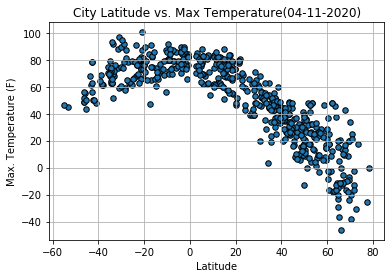

In [8]:
# Build a scatter plot for each data type
now = datetime.datetime.now()
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s= 30 , edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + str(now.strftime("(%m-%d-%Y)")))
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Latitude vs. Temperature Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

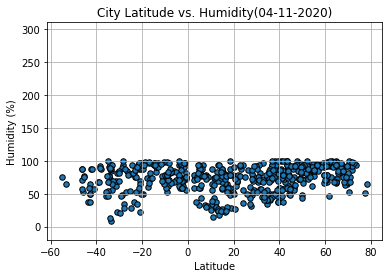

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s= 30 , edgecolor='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + str(now.strftime("(%m-%d-%Y)")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-20, 310)
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

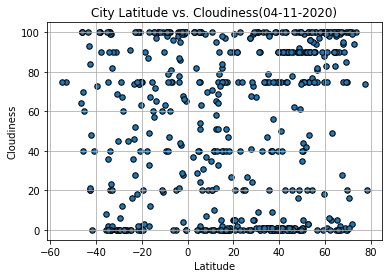

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s= 30 , edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + str(now.strftime("(%m-%d-%Y)")))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

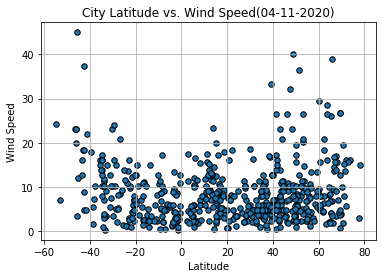

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s= 30 , edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + str(now.strftime("(%m-%d-%Y)")))
plt.ylabel( "Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Latitude vs. Wind speed Plot.png")

# Show plot
plt.show()

## Linear Regression

The r-squared is: -0.7814947576315421


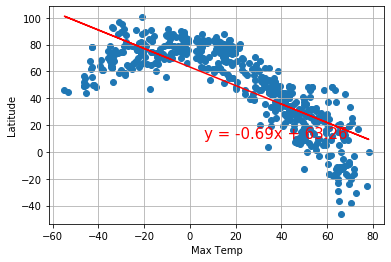

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/r-squared value.png")
plt.show()


In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[(weather_data["Lat"]>=0)]
Southern_df = weather_data.loc[(weather_data["Lat"]<0)]
northern_df.set_index("City_ID")
Southern_df.set_index("City_ID")

,Unnamed: 0,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
Bima,0,79,ID,1578282998,61,-8.45,118.73,86.61,3.51
Bambous Virieux,1,75,MU,1578282772,94,-20.34,57.76,75.99,12.75
Jamestown,2,82,AU,1578283000,55,-33.21,138.60,73.40,0.31
Puerto Ayora,6,0,EC,1578283005,81,-0.74,-90.35,75.99,4.00
Nabire,8,86,ID,1578283007,58,-3.36,135.50,88.97,4.41
...,...,...,...,...,...,...,...,...,...
Sambava,535,72,MG,1578283839,93,-14.27,50.17,70.92,2.35
Luganville,540,75,VU,1578283845,74,-15.51,167.18,86.00,10.29
Kroonstad,543,0,ZA,1578283848,88,-27.65,27.24,64.99,5.03


In [18]:
northern_df.set_index()

TypeError: set_index() missing 1 required positional argument: 'keys'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8770070503648136


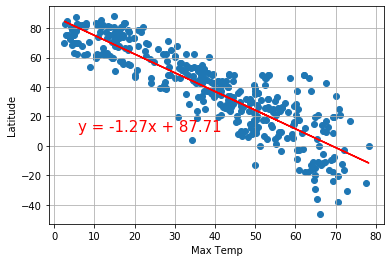

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5504134551828878


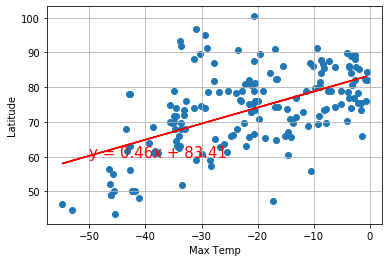

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
x_values = Southern_df["Lat"]
y_values = Southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40846218104978393


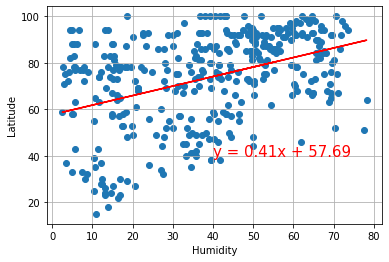

In [22]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22219334019905435


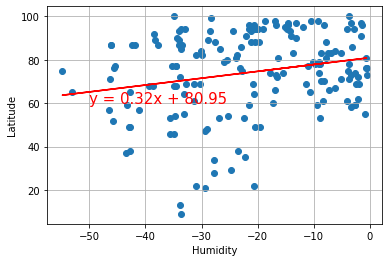

In [23]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21458881562450322


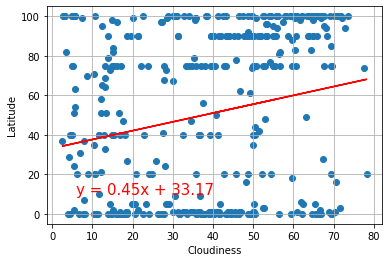

In [24]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13838125783075889


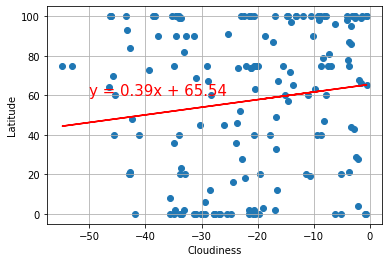

In [25]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007045989567108817


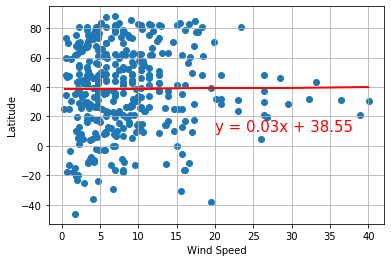

In [26]:
x_values = northern_df["Wind Speed"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.102424272650797


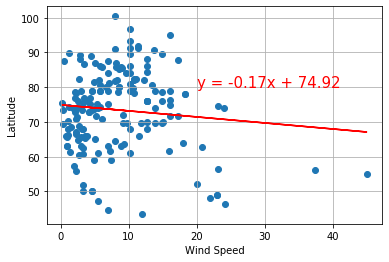

In [27]:
x_values = Southern_df["Wind Speed"]
y_values = Southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.grid(True)
plt.savefig("../Output_Data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#3 findings - 
#Linear Regression plots for Max temperature and latitude northern hemisphere shows negetive corelation and vice versa for southern hemisphere
# For humidity and Latitude , its positive corelation for both the hemispheres
# For Cloudiness and Latitude , its positive corelation for both the hemispheres